In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from google.colab import output

In [ ]:
# Function to split data into train, validation, and test sets and print the percentage of each
def split_data_and_print_percentages(df, target_column, ratio_train=0.6, ratio_val=0.2, ratio_test=0.2):
    x = df.drop(target_column, axis=1)
    y = df[target_column]

    ratio_remaining = 1 - ratio_test
    ratio_val_adjusted = ratio_val / ratio_remaining

    x_remaining, x_test, y_remaining, y_test = train_test_split(x, y, test_size=ratio_test, random_state=42)
    x_train, x_val, y_train, y_val = train_test_split(x_remaining, y_remaining, test_size=ratio_val_adjusted, random_state=42)

    total_samples = len(df)
    train_samples = len(x_train)
    val_samples = len(x_val)
    test_samples = len(x_test)

    train_percentage = (train_samples / total_samples) * 100
    val_percentage = (val_samples / total_samples) * 100
    test_percentage = (test_samples / total_samples) * 100

    print(f"Train set: {train_percentage:.2f}% of total data")
    print(f"Validation set: {val_percentage:.2f}% of total data")
    print(f"Test set: {test_percentage:.2f}% of total data")

    return x_train, x_val, x_test, y_train, y_val, y_test

In [ ]:
def train_model_for_target(df, target_column):
    # Remove limit on output
    output.no_vertical_scroll()

    # Splitting the dataset into training, validation, and test sets, and printing the percentage of each
    x_train, x_val, x_test, y_train, y_val, y_test = split_data_and_print_percentages(df, target_column)

    min_leaf_values = list(range(1, 25))
    accuracies = []
    clf_trainers = []

    print(f"\nTraining model for target column: {target_column}\n")
    for min_leaf in min_leaf_values:
        clf = DecisionTreeClassifier(min_samples_leaf=min_leaf)
        clf = clf.fit(x_train, y_train)
        y_val_pred = clf.predict(x_val)
        accuracy = metrics.accuracy_score(y_val, y_val_pred)
        accuracies.append(accuracy)
        clf_trainers.append(clf)
        print(f"Min Samples Leaf: {min_leaf}, Accuracy: {accuracy}")

    print(f"\nTraining complete for target column: {target_column}")

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(min_leaf_values, accuracies, marker='o')
    plt.title(f'Validation Accuracy vs. Min Samples Leaf for {target_column}')
    plt.xlabel('Min Samples Leaf')
    plt.ylabel('Validation Accuracy')
    plt.grid(True)
    plt.show()

    best_min_leaf, accuracy, best_clf = find_best_min_leaf_clf(min_leaf_values, accuracies, clf_trainers)
    print(f"\nBest Min Samples Leaf for {best_min_leaf}, Accuracy: {accuracy}")

    validate_model_for_target_and_plot_confusion_matrix(best_clf, x_test, y_test)

def find_best_min_leaf_clf(min_leaf_values, accuracies, clf_trainers):
    best_index = np.argmax(accuracies)
    best_min_leaf = min_leaf_values[best_index]
    return best_min_leaf, accuracies[best_index], clf_trainers[best_index]

def validate_model_for_target_and_plot_confusion_matrix(clf, x_test, y_test):
    y_test_pred = clf.predict(x_test)
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    print(f"Test accuracy with best min_samples_leaf: {test_accuracy:.4f}")

    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix - Test Set")
    plt.show()

# Read and Encode Non-Numeric Fields for Training

In [ ]:
# load dataset
df = pd.read_csv('heart.csv')

# Encode non-numeric fields
categorical_cols = df.select_dtypes(exclude=["number"]).columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


# Setup Training for HeartDisease Target



<IPython.core.display.Javascript object>

Train set: 59.91% of total data
Validation set: 20.04% of total data
Test set: 20.04% of total data

Training model for target column: HeartDisease

Min Samples Leaf: 1, Accuracy: 0.8695652173913043
Min Samples Leaf: 2, Accuracy: 0.8260869565217391
Min Samples Leaf: 3, Accuracy: 0.8315217391304348
Min Samples Leaf: 4, Accuracy: 0.8532608695652174
Min Samples Leaf: 5, Accuracy: 0.8586956521739131
Min Samples Leaf: 6, Accuracy: 0.8695652173913043
Min Samples Leaf: 7, Accuracy: 0.8967391304347826
Min Samples Leaf: 8, Accuracy: 0.8913043478260869
Min Samples Leaf: 9, Accuracy: 0.8967391304347826
Min Samples Leaf: 10, Accuracy: 0.9021739130434783
Min Samples Leaf: 11, Accuracy: 0.907608695652174
Min Samples Leaf: 12, Accuracy: 0.8967391304347826
Min Samples Leaf: 13, Accuracy: 0.8804347826086957
Min Samples Leaf: 14, Accuracy: 0.8695652173913043
Min Samples Leaf: 15, Accuracy: 0.8858695652173914
Min Samples Leaf: 16, Accuracy: 0.8641304347826086
Min Samples Leaf: 17, Accuracy: 0.88043478260

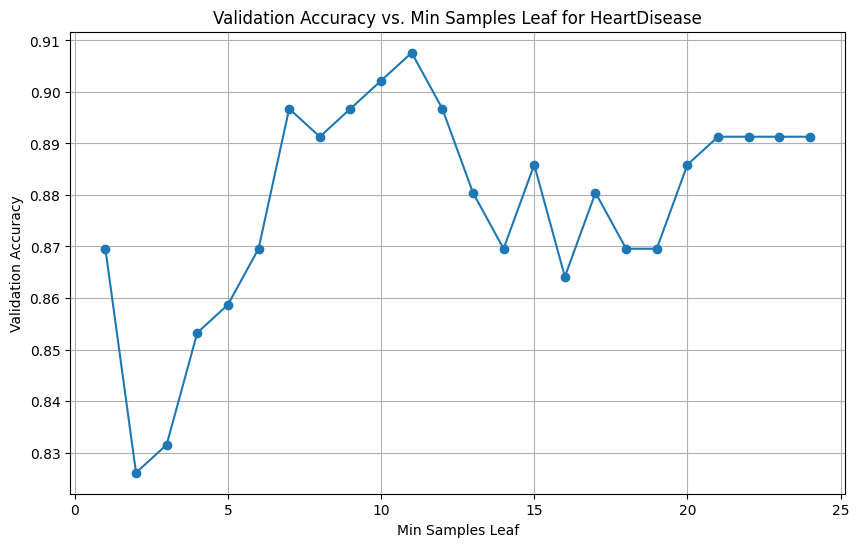


Best Min Samples Leaf for 11, Accuracy: 0.907608695652174
Test accuracy with best min_samples_leaf: 0.8370


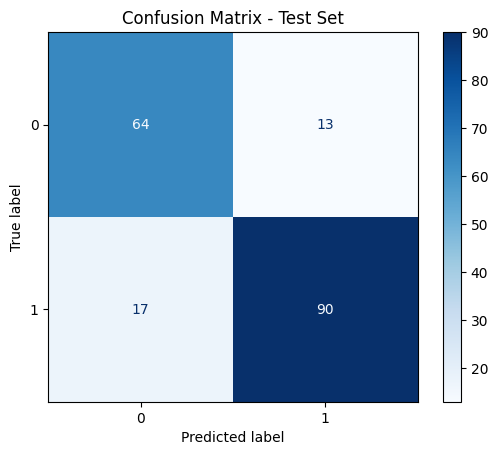

In [ ]:
train_model_for_target(df, 'HeartDisease')

# Setup Training for RestingECG Target

<IPython.core.display.Javascript object>

Train set: 59.91% of total data
Validation set: 20.04% of total data
Test set: 20.04% of total data

Training model for target column: RestingECG

Min Samples Leaf: 1, Accuracy: 0.47282608695652173
Min Samples Leaf: 2, Accuracy: 0.46195652173913043
Min Samples Leaf: 3, Accuracy: 0.4673913043478261
Min Samples Leaf: 4, Accuracy: 0.483695652173913
Min Samples Leaf: 5, Accuracy: 0.532608695652174
Min Samples Leaf: 6, Accuracy: 0.42391304347826086
Min Samples Leaf: 7, Accuracy: 0.43478260869565216
Min Samples Leaf: 8, Accuracy: 0.47282608695652173
Min Samples Leaf: 9, Accuracy: 0.45652173913043476
Min Samples Leaf: 10, Accuracy: 0.5543478260869565
Min Samples Leaf: 11, Accuracy: 0.5434782608695652
Min Samples Leaf: 12, Accuracy: 0.5543478260869565
Min Samples Leaf: 13, Accuracy: 0.5597826086956522
Min Samples Leaf: 14, Accuracy: 0.5271739130434783
Min Samples Leaf: 15, Accuracy: 0.5380434782608695
Min Samples Leaf: 16, Accuracy: 0.5380434782608695
Min Samples Leaf: 17, Accuracy: 0.53804347

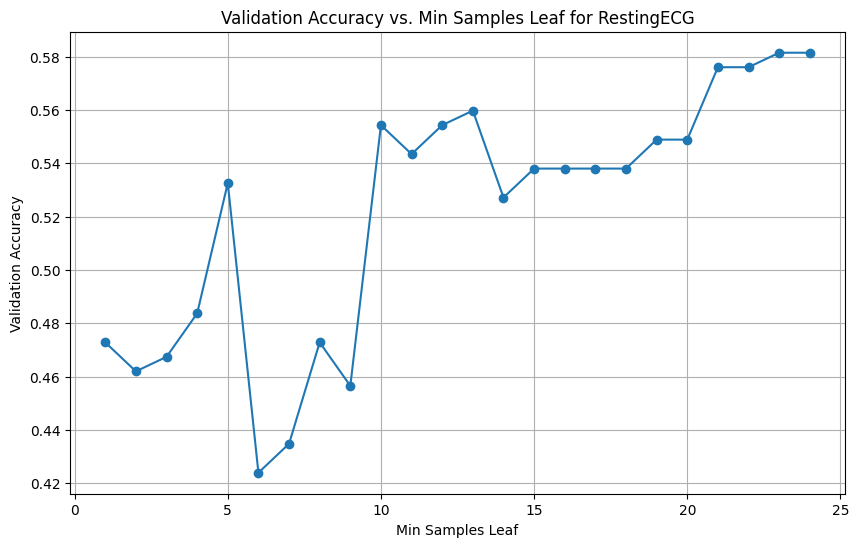


Best Min Samples Leaf for 23, Accuracy: 0.5815217391304348
Test accuracy with best min_samples_leaf: 0.5652


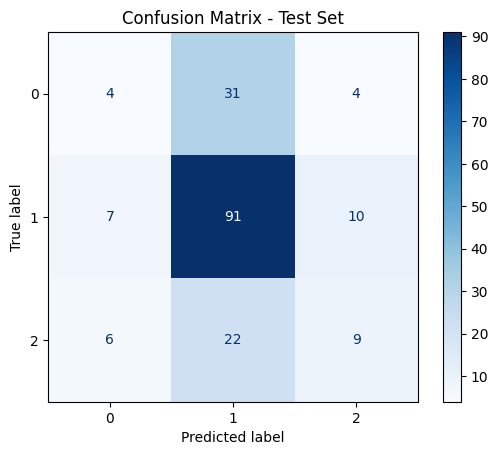

In [ ]:
train_model_for_target(df, 'RestingECG')